In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Subscribers

In [2]:
subscribers = pd.read_pickle('data/subscribers')

subscribers.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
162502  21724479      economy                           NaN          comedy   
380374  23383224         base                           NaN          comedy   
496617  26844789     enhanced                      3.362885        regional   
356799  29417030         base                           NaN           drama   
681701  26723159         base                      3.731089          comedy   

                       intended_use  weekly_consumption_hour  \
162502  access to exclusive content                      NaN   
380374  access to exclusive content                22.951579   
496617                  replace OTT                36.001186   
356799                  replace OTT                20.051667   
681701                  replace OTT                22.951579   

        num_ideal_streaming_services  retarget_TF   age male_TF  ...  \
162502                           NaN        False   NaN   False  ...   
380374                           NaN        False  70.0   False  ...   
496617                      1.951776        False  25.0    True  ...   
356799                           NaN        False  30.0   False  ...   
681701                      2.506384        False  28.0   False  ...   

       creation_until_cancel_days cancel_before_trial_end trial_end_date  \
162502                        NaN                    True     2020-02-08   
380374                        0.0                   False     2020-03-16   
496617                        1.0                   False     2019-12-22   
356799                        0.0                   False     2020-02-11   
681701                        9.0                   False     2019-10-20   

       initial_credit_card_declined  revenue_net join_fee  language  paid_TF  \
162502                        False          NaN      NaN        ar     True   
380374                        False          0.0   0.3303        ar    False   
496617                        False          0.0   0.1101        ar    False   
356799                        False          0.0   0.0367        ar    False   
681701                        False          0.0   0.0367        ar    False   

       refund_after_trial_TF      payment_type  
162502                 False  Standard Charter  
380374                 False               NaN  
496617                 False               NaN  
356799                 False               NaN  
681701                 False               NaN  

[5 rows x 29 columns]

In [116]:
subscribers_columns = ['subid', 'retarget_TF', 'monthly_price', 'discount_price',
                      'creation_until_cancel_days', 'cancel_before_trial_end', 'revenue_net', 'join_fee', 'paid_TF', 'refund_after_trial_TF']

In [8]:
#nas

subscribers.isna().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
retarget_TF                          0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
creation_until_cancel_days       75860
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      34904
join_fee                         34904
language                 

In [5]:
subscribers.shape

(227628, 29)

In [36]:
subscribers['attribution_technical'].value_counts()
# this is probably last interaction

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
criteo                        44
appstore                      44
pinterest_organic             30
influencer                    21
playstore                     12
twitter   

In [37]:
subscribers['attribution_survey'].value_counts()
# tv comes up here because you can't track tv

facebook            119126
tv                   39904
referral             20882
search                8492
pinterest             7856
other                 6496
public_radio          6219
social_organic        3869
youtube               3108
podcast               2995
affiliate             1962
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            408
amfm_radio             337
Name: attribution_survey, dtype: int64

## Engagement

In [6]:
engagement = pd.read_pickle('data/engagement')

engagement.head()

subid       date  app_opens  cust_service_mssgs  num_videos_completed  \
1   22349235 2019-07-01        1.0                 1.0                   0.0   
2   22349235 2019-07-02        1.0                 0.0                   0.0   
3   22349235 2019-07-03        0.0                 1.0                   0.0   
50  20848497 2019-07-02        1.0                 0.0                   7.0   
51  22680106 2019-07-02        2.0                 1.0                   7.0   

    num_videos_more_than_30_seconds  num_videos_rated  num_series_started  \
1                               6.0               0.0                 0.0   
2                               5.0               0.0                 0.0   
3                               0.0               0.0                 0.0   
50                              7.0               0.0                 0.0   
51                              7.0               0.0                 1.0   

    payment_period  
1              0.0  
2              0.0  
3              0.0  
50             0.0  
51             0.0

In [72]:
engagement.shape

(2585724, 9)

In [77]:
# number of users:
len(engagement.subid.drop_duplicates())

135019

## Cust Service Reps

In [4]:
customer_service_reps = pd.read_pickle('data/customer_service_reps')

customer_service_reps.head()

customer_service_rep_id     subid  current_sub_TF cancel_date  \
4                 36189811  25108574           False         NaT   
5                 36189811  25108574           False         NaT   
6                 36189811  25108574           False         NaT   
7                 36189811  25108574           False         NaT   
8                 31174901  25914865            True         NaT   

  account_creation_date  num_trial_days  trial_completed_TF billing_channel  \
4   2019-11-26 03:30:29               7                True          itunes   
5   2019-11-26 03:30:29               7                True          itunes   
6   2019-11-26 03:30:29               7                True          itunes   
7   2019-11-26 03:30:29               7                True          itunes   
8   2020-03-19 01:20:25              14                True          itunes   

   revenue_net_1month  payment_period        last_payment        next_payment  \
4              1.1377               0 2019-11-26 03:30:29 2019-11-26 03:30:29   
5              1.1377               1 2019-11-26 03:30:29 2019-12-27 03:30:29   
6              1.1377               2 2019-12-27 03:30:29 2020-01-26 03:30:29   
7              1.1377               3 2020-01-26 03:30:29                 NaT   
8              1.1377               0 2020-03-19 01:20:25 2020-04-02 01:20:25   

  renew  
4   NaN  
5   NaN  
6   NaN  
7   NaN  
8   NaN

In [116]:
customer_service_reps.shape

(2208643, 13)

In [123]:
len(customer_service_reps.subid.drop_duplicates())

1369360

In [668]:
customer_service_reps['customer_type'] = np.where(customer_service_reps['subid'].isin(subscribers['subid']), 'OTT + subscriber',
                                                 np.where(customer_service_reps['billing_channel'] == 'OTT', 'OTT only',
                                                         customer_service_reps['billing_channel']))

customer_service_reps[['subid', 'customer_type']].drop_duplicates().customer_type.value_counts()

OTT only            1074822
itunes               142253
OTT + subscriber     135050
google                17235
Name: customer_type, dtype: int64

In [43]:
sub_billing = customer_service_reps[['subid', 'billing_channel']].drop_duplicates()

sub_billing.billing_channel.value_counts()

OTT       1209872
itunes     142253
google      17235
Name: billing_channel, dtype: int64

In [693]:
subs_eachtable = customer_service_reps[['subid', 'billing_channel', 'current_sub_TF']].drop_duplicates().merge(subscribers[['subid', 'paid_TF']], on ='subid', how ='outer')
subs_eachtable = subs_eachtable.merge(engagement.groupby('subid').payment_period.agg('max').reset_index(), on ='subid', how ='outer')

subs_eachtable['engagement'] = np.where(subs_eachtable['payment_period'].isna(), 0, 1)
subs_eachtable['subscribers'] = np.where(subs_eachtable['paid_TF'].isna(), 0, 1)
subs_eachtable['cust_service'] = np.where(subs_eachtable['billing_channel'].isna(), 0, 1)

subs_eachtable = subs_eachtable.fillna('Null')

subs_eachtable['sub_type'] = np.where(subs_eachtable['billing_channel'].isin(['google', 'itunes']), 'App only',
                                     np.where(subs_eachtable['billing_channel'] == "Null", 'Subscriber,\nno cust service',
                                             np.where(subs_eachtable['subscribers'] == 0, 'OTT only',
                                                     'OTT and\nsubscriber')))

subs_eachtable.head()

subid billing_channel current_sub_TF paid_TF payment_period  engagement  \
0  25108574          itunes          False    Null           Null           0   
1  25914865          itunes           True    Null           Null           0   
2  28778936          google           True    Null           Null           0   
3  21481314          google           True    Null           Null           0   
4  24230000          google           True    Null           Null           0   

   subscribers  cust_service  sub_type  
0            0             1  App only  
1            0             1  App only  
2            0             1  App only  
3            0             1  App only  
4            0             1  App only

In [817]:
subs_typecount = subs_eachtable.pivot_table(index ='sub_type', columns = 'current_sub_TF', values ='subid', aggfunc ='count', fill_value = 0)

subs_typecount.columns = ['Churned', 'Active', 'Unknown']
#subs_typecount['Total'] = subs_typecount.sum(axis = 1)

subs_typecount

Churned  Active  Unknown
sub_type                                              
App only                       131143   28345        0
OTT and\nsubscriber            102695   32355        0
OTT only                       806211  268611        0
Subscriber,\nno cust service        0       0    92578

In [818]:
print("Total customers: %d" % subs_typecount.sum().sum())

Total customers: 1461938


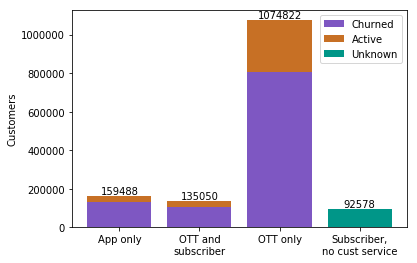

In [725]:
plt.bar(subs_typecount.index, subs_typecount['Churned'], label = "Churned", color = '#7e57c2')
plt.bar(subs_typecount.index, subs_typecount['Active'], bottom = subs_typecount['Churned'], 
        label = "Active", color = '#c77025')
plt.bar(subs_typecount.index, subs_typecount['Unknown'], label = "Unknown", color = '#009688')

for i in range(0, len(subs_typecount)):
    plt.text(x= subs_typecount.index[i], y = subs_typecount['Total'][i], s = subs_typecount['Total'][i],
            verticalalignment='bottom', horizontalalignment='center')

plt.legend()
plt.ylabel('Customers')
plt.show()

In [669]:
subs_typecount

index  sub_type   type2
0                  OTT only   1074822       0
1                  App only    159488       0
2        OTT and subscriber    135050  135050
3  Missing customer service     92578       0

In [131]:
ids_analyze = subs_eachtable[subs_eachtable['sub_type'] == 'OTT and subscriber'].subid.values

print("Total ids to analyze: %d" % len(ids_analyze))

Total ids to analyze: 135050


## Acquisition channel

* Attribution technical aligns more closely with the money that invested (no TV no radio)

In [561]:
subscribers['attribution_technical'].value_counts().head(10)

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
Name: attribution_technical, dtype: int64

In [562]:
subscribers['attribution_survey'].value_counts().head(10)

facebook          119126
tv                 39904
referral           20882
search              8492
pinterest           7856
other               6496
public_radio        6219
social_organic      3869
youtube             3108
podcast             2995
Name: attribution_survey, dtype: int64

In [567]:
spend = pd.read_csv('data/advertisingspend.csv')
spend['date'] = pd.to_datetime(spend['date'], infer_datetime_format=True).dt.to_period('M')
spend.head()

date  facebook  email  search  brand sem intent google  affiliate  \
0  2019-06     84800  75000   17300                    21400      11900   
1  2019-07     60000  75600   17300                    21300      12000   
2  2019-08     52300  76100   18100                    21300      16300   
3  2019-09     49000  75800   18900                    21300      16400   
4  2019-10     51300  76000   21000                    21400      12200   

   email_blast  pinterest  referral  
0        10500       5900      6100  
1        29800       6000      6600  
2        65900       6200      6800  
3        73700       6000      7400  
4        32300       6700      7300

In [598]:
sum_spend = spend.drop('date', axis = 1).sum().sort_values(ascending=False)
sum_spend

email                      760600
facebook                   552700
search                     232500
email_blast                226400
brand sem intent google    216100
affiliate                  139500
referral                    73400
pinterest                   63300
dtype: int64

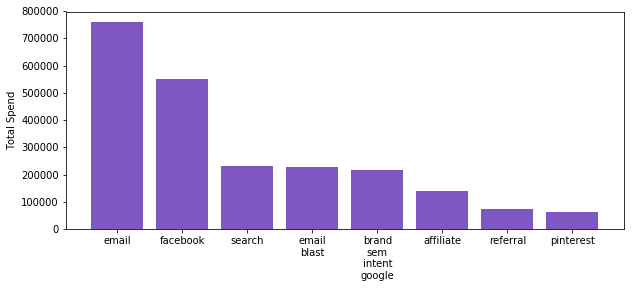

In [732]:
# spend total
plt.figure(figsize = (10,4))
plt.bar(sum_spend.index.str.replace('_', '\n').str.replace(' ', '\n'), sum_spend, color = '#7e57c2')
plt.ylabel('Total Spend')
plt.show()

In [600]:
acq_channel = df[(df['refund_after_trial_TF'] == False) & (df['payment_period'] > 0)].groupby(['subid', 'account_creation_date']).payment_period.agg('max').reset_index()

acq_channel = acq_channel.merge(subscribers[['subid', 'attribution_technical', 'attribution_survey']], on = 'subid')

# aligning attribution channel to spend channels
acq_channel['attribution_technical2'] = np.where(acq_channel['attribution_technical'].isin(spend.columns), acq_channel['attribution_technical'], 
                                                 np.where(acq_channel['attribution_technical'].str.contains("organic"), "organic", 'other'))

acq_channel.head()

subid account_creation_date  payment_period attribution_technical  \
0  20000604   2020-02-09 13:26:49               1              facebook   
1  20000685   2020-03-03 05:55:37               1              referral   
2  20000796   2019-09-26 02:15:40               1              facebook   
3  20000809   2019-07-13 20:40:21               3               organic   
4  20001112   2019-09-14 03:49:52               1               organic   

  attribution_survey attribution_technical2  
0           facebook               facebook  
1           referral               referral  
2           referral               facebook  
3           facebook                organic  
4           facebook                organic

In [583]:
len(acq_channel)

53172

In [602]:
# which channels didn't they spend in
acq_channel[~acq_channel['attribution_technical'].isin(spend.columns)].attribution_technical.value_counts()

organic                  5902
google_organic           3099
facebook_organic          637
brand sem intent bing     603
other                     587
discovery                 449
internal                  412
bing                      235
podcast                   210
display                   205
bing_organic              117
youtube                   109
direct_mail                47
vod                        43
samsung                    26
ott                        21
appstore                   20
quora                      14
pinterest_organic           7
criteo                      6
twitter                     2
content_greatist            2
influencer                  2
tv                          1
Name: attribution_technical, dtype: int64

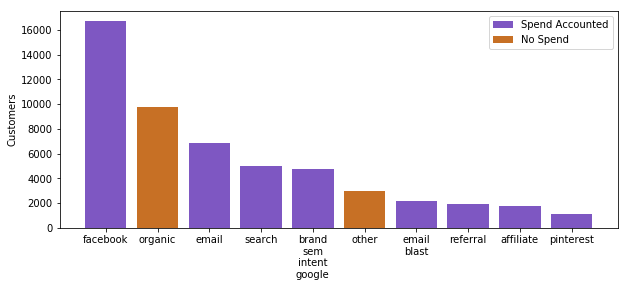

In [738]:
sum_acqchannel = acq_channel.attribution_technical2.value_counts()
sum_acqchannel2 = np.where(sum_acqchannel.index.isin(spend.columns), 0, sum_acqchannel)

plt.figure(figsize = (10,4))
plt.bar(sum_acqchannel.index.str.replace('_', '\n').str.replace(' ', '\n'),sum_acqchannel, 
        color = '#7e57c2', label = 'Spend Accounted')
plt.bar(sum_acqchannel.index.str.replace('_', '\n').str.replace(' ', '\n'),sum_acqchannel2, 
        color = '#c77025', label = 'No Spend')
plt.legend()
plt.ylabel('Customers')
plt.show()

In [589]:
acq_channel.attribution_survey.value_counts().head(10)
# survey ads tv and radio

facebook          26647
tv                 9123
referral           6909
public_radio       2059
pinterest          1623
search             1536
other              1289
social_organic      798
podcast             737
youtube             421
Name: attribution_survey, dtype: int64

In [763]:
acq_channel['month'] = acq_channel['account_creation_date'].dt.to_period('M')

acq_month = acq_channel.groupby('month').subid.agg('count')

In [773]:
acq_channel.pivot_table(index = 'month', columns ='attribution_technical2', values = 'subid', aggfunc ='count')

attribution_technical2  affiliate  brand sem intent google  email  \
month                                                               
2019-06                        36                       82    125   
2019-07                       317                      680   1302   
2019-08                       207                      450    730   
2019-09                       242                      427    600   
2019-10                        65                      374    488   
2019-11                        85                      697    826   
2019-12                        98                      524    640   
2020-01                       114                      409    402   
2020-02                       256                      620    750   
2020-03                       358                      500    967   

attribution_technical2  email_blast  facebook  organic  other  pinterest  \
month                                                                      
2019-06                          55       414      164     39         10   
2019-07                         711      2798     1497    371        175   
2019-08                         197      1732      627    202        108   
2019-09                         557      1252      843    326        104   
2019-10                         273      1422      697    218         91   
2019-11                         264      3190     1098    402        150   
2019-12                          82      1600      796    247        126   
2020-01                          13       722      728    305        106   
2020-02                          25      1762     1452    502        166   
2020-03                          21      1838     1860    382        123   

attribution_technical2  referral  search  
month                                     
2019-06                       14      28  
2019-07                      240     362  
2019-08                      158     383  
2019-09                      227     377  
2019-10                      157     380  
2019-11                      263     655  
2019-12                      208     639  
2020-01                      171     491  
2020-02                      227     929  
2020-03                      270     779

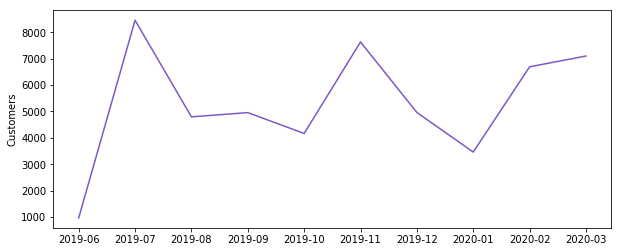

In [776]:
# monthly acquisition
plt.figure(figsize = (10,4))
plt.plot(acq_month.index.astype(str), acq_month, color = '#7e57c2')
plt.ylabel('Customers')
plt.show()

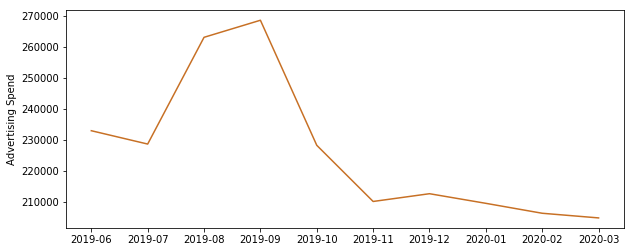

In [778]:
# monthly spend
plt.figure(figsize = (10,4))
plt.plot(acq_month.index.astype(str), spend.iloc[:,1:].sum(axis = 1),
        color = '#c77025')
plt.ylabel('Advertising Spend')
plt.show()

## Summary for Final Presentation

In [831]:
def print_summary(df, date_col):
    print('Total Rows: %d' % len(df))
    print('Unique Customers: %d' % len(df.subid.drop_duplicates()))
    print('Min date: %s' % str(min(df[date_col])))
    print('Max date: %s' % str(max(df[date_col])))

In [832]:
print('Customer Service Reps')
print_summary(customer_service_reps, 'account_creation_date')

Customer Service Reps
Total Rows: 2201474
Unique Customers: 1369360
Min date: 2019-06-30 00:00:04
Max date: 2020-03-28 00:00:00


In [834]:
print('Subscribers')
print_summary(subscribers, 'account_creation_date')

Subscribers
Total Rows: 227628
Unique Customers: 227628
Min date: 2019-06-30 00:00:19
Max date: 2020-03-27 23:59:06


In [836]:
print('Engagement')
print_summary(engagement, 'date')

Engagement
Total Rows: 2585724
Unique Customers: 135019
Min date: 2019-06-30 00:00:00
Max date: 2020-04-25 00:00:00
